# Activity 5

* Download the Activity5 lab and upload it onto Google Colab.
* Answer the Activity5 questions in Canvas and populate the cells below
* Submit Activity5 questions on Canvas and upload the PDF version of this lab:
>* To submit the this lab as PDF, go to File, click Print, then save it as PDF instead of printing it

# Business Problem

Pepper Smith is a Senior Data Scientist at a large-scale candy retailer. She has hired you to perform unsupervised data mining on her data to generate insights about her customers and products.

First, Pepper has tasked you with performing Association Rule Mining on transaction data from 10 customers at one of her retail locations.

Then, you will use data about the candy bar nutritional content (Calories, Fat, Protein, and Carbohydrates) of 37 candy bars to group candy  into clusters based on their nutritional similarities.

# Import Packages

In [ ]:
# do not manipluate this cell - just run it

import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

from sklearn.preprocessing import StandardScaler # standardization
from sklearn.metrics import silhouette_score # cluster validation
from sklearn.cluster import KMeans # k-Means clustering
import matplotlib.pylab as plt # plotting
from sklearn import set_config # for pandas output

set_config(transform_output = "pandas") # obtain pandas dataframe output from preprocessing steps

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

# Part 1: Association Rule Mining

## Data Import

In [ ]:
# do not manipluate this cell - just run it

dataset = [['Baby Ruth', 'Snickers', 'Twizzlers', 'Kit Kat'],
           ['Twizzlers', 'Rolo', 'Goobers'],
           ['Starburst', 'Milky Way', 'Skittles', 'Snickers', 'Mounds', 'Kit Kat'],
           ['Milky Way', 'Butterfinger', 'Twizzlers'],
           ['Butterfinger', 'Kit Kat', 'Goobers', 'Rolo', 'Skittles'],
           ['Rolo', 'Starburst', 'Skittles'],
           ['Goobers', 'Baby Ruth', 'Skittles', 'Milky Way'],
           ['Almond Joy', 'Butterfinger', 'Snickers', 'Twizzlers'],
           ['Kit Kat', 'Twizzlers', 'Goobers', 'Snickers'],
           ['Almond Joy', 'Snickers', 'Kit Kat']]

In [ ]:
# do not manipluate this cell - just run it

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Almond Joy,Baby Ruth,Butterfinger,Goobers,Kit Kat,Milky Way,Mounds,Rolo,Skittles,Snickers,Starburst,Twizzlers
0,False,True,False,False,True,False,False,False,False,True,False,True
1,False,False,False,True,False,False,False,True,False,False,False,True
2,False,False,False,False,True,True,True,False,True,True,True,False
3,False,False,True,False,False,True,False,False,False,False,False,True
4,False,False,True,True,True,False,False,True,True,False,False,False
5,False,False,False,False,False,False,False,True,True,False,True,False
6,False,True,False,True,False,True,False,False,True,False,False,False
7,True,False,True,False,False,False,False,False,False,True,False,True
8,False,False,False,True,True,False,False,False,False,True,False,True
9,True,False,False,False,True,False,False,False,False,True,False,False


## Q1

* Which of the following code lines can be used to generate frequent itemsets using a minsup of 0.12?
* Select the right answer from Canvas, paste it below, and run the cell

In [ ]:
# Copy and paste your answer from Canvas to Here

frequent_itemsets = apriori(df, min_support = 0.12, use_colnames = True)

## Q2

* Run the code cell below to output the support for the frequent itemsets.
* Based on the output, which of the following statements is true?
* Select the right answer from Canvas.

In [ ]:
# do not manipluate this cell - just run it

frequent_itemsets

,support,itemsets
0,0.2,(Almond Joy)
1,0.2,(Baby Ruth)
2,0.3,(Butterfinger)
3,0.4,(Goobers)
4,0.5,(Kit Kat)
5,0.3,(Milky Way)
6,0.3,(Rolo)
7,0.4,(Skittles)
8,0.5,(Snickers)
9,0.2,(Starburst)


## Q3

* Run the code cell below to generate association rules.
* Based on the code line, you are generating rules that have a minimum confidence of ____?
* Select the right answer from Canvas.

In [ ]:
# do not manipluate this cell - just run it

arules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)

## Q4

* Run the code cell below to output the association rules and their interestingness measures
* Based on the output, which of the following rules is not an interesting rule?
* Select the right answer from Canvas.

In [ ]:
# do not manipluate this cell - just run it

arules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
0,(Almond Joy),(Snickers),0.2,1.000000,2.000000
1,(Butterfinger),(Twizzlers),0.2,0.666667,1.333333
2,(Goobers),(Kit Kat),0.2,0.500000,1.000000
3,(Rolo),(Goobers),0.2,0.666667,1.666667
4,(Goobers),(Rolo),0.2,0.500000,1.666667
5,(Skittles),(Goobers),0.2,0.500000,1.250000
6,(Goobers),(Skittles),0.2,0.500000,1.250000
7,(Goobers),(Twizzlers),0.2,0.500000,1.000000
8,(Skittles),(Kit Kat),0.2,0.500000,1.000000
9,(Kit Kat),(Snickers),0.4,0.800000,1.600000


## Q5

* No code needed.
* Select the right answer in Canvas.

# Part 2: Cluster Analysis

## Data Import

In [ ]:
# do not manipluate this cell - just run it

data = pd.read_csv('https://raw.githubusercontent.com/CHill-MSU/INFO265_Data/refs/heads/main/Candy.csv', index_col = 0)
data.head()

,Calories,Fat,Protein,Carb
Brands,,,,
Peanut Butter Twix,311.0,18.5,5.3,31.4
Baby Ruth,275.0,13.0,3.2,39.0
Caramel Twix,284.5,14.0,2.5,37.5
5th Avenue,279.5,12.5,4.5,41.0
Snickers,273.0,14.0,4.5,34.0


In [ ]:
# do not manipluate this cell - just run it

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, Peanut Butter Twix to Twizzlers Cherry Nibs 
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Calories  37 non-null     float64
 1   Fat       37 non-null     float64
 2   Protein   37 non-null     float64
 3   Carb      37 non-null     float64
dtypes: float64(4)
memory usage: 1.4+ KB


In [ ]:
# do not manipluate this cell - just run it

data.describe()

,Calories,Fat,Protein,Carb
count,37.000000,37.000000,37.000000,37.000000
mean,225.864865,10.529730,3.135135,32.394595
std,37.910649,4.121681,1.723242,9.158995
min,139.000000,1.000000,0.000000,19.000000
25%,209.000000,8.500000,2.000000,28.500000
50%,229.500000,11.500000,2.500000,31.500000
75%,245.500000,13.000000,4.500000,34.000000
max,311.000000,18.500000,7.000000,66.000000


## Q6

* Which of the following code lines can be used to standardize the data and store it as a dataframe named X?
* Select the right answer from Canvas, paste it below, and run the cell

In [ ]:
# Copy and paste your answer from Canvas to Here

scaler = StandardScaler()
X = scaler.fit_transform(data)

## Q7

* Run the code cell below to plot the Silhouette Plot to identify the best number of clusters, k.
* Based on the plot, how many clusters should you use in your k-means cluster analysis?
* Select the right answer from Canvas.

<Axes: xlabel='k', ylabel='Average Silhouette'>

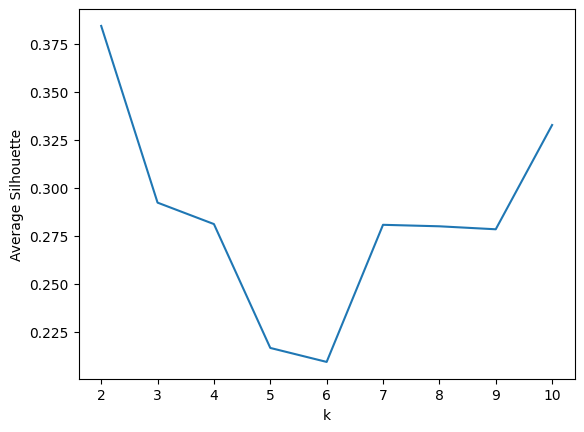

In [ ]:
# do not manipluate this cell - just run it

search_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]
Sil = []
for n_clusters in search_k:
    km = KMeans(n_clusters = n_clusters, random_state = 123).fit(X)
    Sil.append(silhouette_score(X, km.labels_))

k_Sil = pd.DataFrame(zip(search_k, Sil), columns = ['k', 'Average_Silhouette'])
k_Sil.plot(x = 'k', y = 'Average_Silhouette', legend = False, ylabel = 'Average Silhouette')

## Q8

* Which of the following code lines can be used to perform k-means cluster analysis with your chosen number of clusters in Q7?
* Select the right answer from Canvas, paste it below, and run the cell

In [ ]:
# Copy and paste your answer from Canvas to Here

kmeans = KMeans(n_clusters = 2, random_state = 123).fit(X)

## Q9

* Run the code cell below to output the standarized cluster centers.
* Based on the output, which of the following statements is true?
* Select the right answer from Canvas.

In [ ]:
# do not manipluate this cell - just run it

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
print(round(centroids,2))

   Calories   Fat  Protein  Carb
0     -0.72 -1.38    -1.02  0.89
1      0.27  0.51     0.38 -0.33


## Q10

* No code needed.
* Select the right answer in Canvas.